In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import urllib.request
import pandas as pd

In [3]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', filename='ratings_train.txt' )
urllib.request.urlretrieve('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt', filename='ratings_test.txt' )

('ratings_test.txt', <http.client.HTTPMessage at 0x7ba3f22a01f0>)

In [4]:
train_dataset = pd.read_table('ratings_test.txt')
train_dataset

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [5]:
len(train_dataset)

50000

# 2. 데이터 전처리

In [6]:
# 결측치 확인하고 결측치 제거
# 데이터셋 결측값 제거하고 총 데이터셋 갯수 출력
train_dataset.replace('', float('NaN'), inplace=True)
train_dataset.isnull().values.any()

train_dataset = train_dataset.dropna().reset_index(drop=True)
len(train_dataset)

49997

In [7]:
# 열을 기준으로 중복 데이터 제거
# 열을 기준으로 중복된 데이터 제거
train_dataset = train_dataset.drop_duplicates(['document']).reset_index(drop=True)
len(train_dataset)

49157

In [8]:
# 한글이 아닌 문자를 포함하는 데이터를 제거(단, ㅋㅋㅋ는 제거하지 않음)

train_dataset['document'] = train_dataset['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')
train_dataset

<ipython-input-8-687e5ffde5f3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_dataset['document'] = train_dataset['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
...,...,...,...
49152,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49153,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49154,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49155,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [9]:
# 너무 짧은 단어를 제거(단어의 길이가 한글자인 단어만 제거)

train_dataset['document'] = train_dataset['document'].apply(lambda x: ' '.join([token for token in x.split() if len(token) > 1]))
train_dataset

,id,document,label
0,6270596,,1
1,9274899,,0
2,8544678,뭐야 평점들은 나쁘진 않지만 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,아니었어도 다섯 줬을텐데 나와서 심기를 불편하게 하죠,0
...,...,...,...
49152,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49153,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49154,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49155,5802125,절대 봐서는 영화 재미도 없고 기분만 잡치고 세트장에서 해먹네,0


In [10]:
# 전체 길이가 60자 이하이거나 전체 단어 개수가 5개 이하인 데이터 제거

train_dataset = train_dataset[train_dataset.document.apply(lambda x: len(str(x)) > 60 and len(str(x).split()) >5)].reset_index(drop=True)
train_dataset

,id,document,label
0,8932678,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한 ...,0
1,6900881,청춘은 아름답다 아름다움은 이성을 흔들어 놓는다 찰나의 아름다움을 포착한 섬세하고 ...,1
2,9037756,스토리 연출 연기 비주얼 영화의 기본 조차 안된 영화에 무슨 평을 이런 영화 찍고도...,0
3,9305768,일의 금요일 나이트메어 시리즈와 함께 가장 많은 시리즈를 양산해냈던 헬레이저 시리즈...,1
4,9952932,괜히 나올 어미 건드려서 긁어 부스름 만들었다는 분이 아래 보이던데 영화 제대로 봤...,1
...,...,...,...
5968,8787645,편의 무어 감독은 만약에 편을 만든다 하면 편까진 복습하고 오시길 그게 뭡니까 대체...,1
5969,6833821,당신의 꿈은 지금 안녕하신가요 유쾌하고 감동적이고 꿈을 잊고 사는 현대인들이 보면 ...,1
5970,8527261,영화 초반 존쿠삭이 바네사 허진스 가두고 틀던 팝송 정말 좋던데 아시는분 제목과 가...,0
5971,6694209,그래서 하고 싶은 말이 뭔데 연출만 잘했더라면 훨씬 흥미로웠을텐데 몇가지 기발한 발...,0


In [11]:
!pip install konlpy

In [12]:
from konlpy.tag import Okt

In [13]:
# 불용어 정의
stopwords = ['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를', '들면', '예를', '들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수', '없다', '해서는', '안된다', '뿐만', '아니라', '만이', '아니다', '만은', '아니다', '막론하고', '관계없이', '그치지', '않다', '그러나', '그런데', '하지만', '든간에', '논하지', '않다', '따지지', '않다', '설사', '비록', '더라도', '아니면', '만', '못하다', '하는', '편이', '낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이', '외에', '이', '밖에', '하여야', '비로소', '한다면', '몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할', '생각이다', '하려고하다', '이리하여', '그리하여', '그렇게', '함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에', '틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼']
stopwords


['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를',
 '들면',
 '예를',
 '들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수',
 '없다',
 '해서는',
 '안된다',
 '뿐만',
 '아니라',
 '만이',
 '아니다',
 '만은',
 '아니다',
 '막론하고',
 '관계없이',
 '그치지',
 '않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지',
 '않다',
 '따지지',
 '않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만',
 '못하다',
 '하는',
 '편이',
 '낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이',
 '외에',
 '이',
 '밖에',
 '하여야',
 '비로소',
 '한다면',
 '몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할',
 '생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게',
 '함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에',
 '틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',


In [14]:
train_dataset = list(train_dataset['document'])

In [15]:
# 모든 형태소를 tokenized_data에 저장
# 단 원형으로 표기

okt = Okt()
tokenized_data = []
for sentence in train_dataset:
    tokenized_sentence = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    tokenized_data.append(stopwords_removed_sentence)


In [16]:
tokenized_data[0]

['갈수록',
 '개판',
 '되다',
 '중국영화',
 '유치하다',
 '내용',
 '폼',
 '잡다',
 '끝나다',
 '말',
 '도',
 '안되다',
 '무기',
 '유치하다',
 '남무',
 '그리다',
 '동사서독',
 '같다',
 '영화',
 '이건',
 '류',
 '류작',
 '이다']

In [17]:
# plt.hist(x= 문장의 길이, y=단어의 갯수)
# 리뷰의 최대 길이, 리뷰의 평균 길이 print
import matplotlib.pyplot as plt

In [18]:
print('리뷰의 최대 길이: ', max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이: ', sum(map(len, tokenized_data)) / len(tokenized_data))

리뷰의 최대 길이:  65
리뷰의 평균 길이:  30.571404654277583


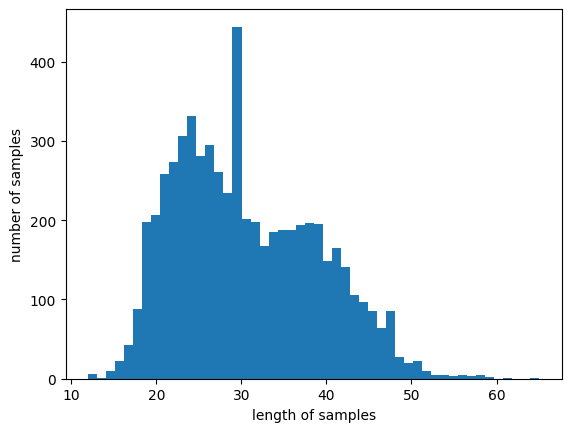

In [19]:
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 3. 워드 임베딩 구축

In [20]:
from gensim.models import Word2Vec

In [21]:
embedding_dim = 100

# sg : 0(CBOW), 1(Skip_gram)
model = Word2Vec(
    sentences = tokenized_data,
    vector_size = embedding_dim,
    window = 5,
    min_count = 5,
    workers = 4,
    sg = 0
)

In [22]:
# 임베딩 행렬의 크기
model.wv.vectors.shape

(3946, 100)

In [23]:
word_vectors = model.wv
vocabs = list(word_vectors.index_to_key)
vocabs[:20]

['하다',
 '영화',
 '보다',
 '도',
 '들',
 '는',
 '은',
 '있다',
 '이다',
 '같다',
 '한',
 '좋다',
 '되다',
 '너무',
 '적',
 '에서',
 '정말',
 '과',
 '진짜',
 '연기']

In [24]:
for sim_word in model.wv.most_similar('영화'):
  print(sim_word)

('이렇다', 0.9892699122428894)
('드라마', 0.9885597229003906)
('처음', 0.9879918694496155)
('명작', 0.9876449704170227)
('중', 0.9875734448432922)
('쓰레기', 0.9875611066818237)
('최악', 0.9875147938728333)
('최고', 0.987226665019989)
('이영화', 0.9856350421905518)
('지금', 0.9855684041976929)


In [25]:
for sim_word in model.wv.most_similar('좋다'):
  print(sim_word)

('너무', 0.9907832741737366)
('도', 0.9891716241836548)
('정말', 0.9865385293960571)
('어색하다', 0.9863789081573486)
('연출', 0.9854108095169067)
('잘', 0.9850993752479553)
('연기력', 0.9849147796630859)
('스토리', 0.9838792085647583)
('조연', 0.9837486147880554)
('특히', 0.983488917350769)


In [26]:
model.wv.similarity('좋다','멋지다')

0.9797395

# 4. 워드 임베딩 시각화

In [27]:
import matplotlib.font_manager

In [28]:
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

['NanumSquare',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumGothicCoding',
 'NanumSquare',
 'NanumGothic',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumGothicCoding']

In [29]:
plt.rc('font', family='NanumBarunGothic')

In [30]:
word_vector_list = [word_vectors[word] for word in vocabs]
word_vector_list[0]

array([-0.17283122,  0.35027084,  0.12574397,  0.11856085, -0.01530624,
       -0.6318781 ,  0.308729  ,  0.97321254, -0.30763638, -0.30114597,
       -0.19838855, -0.6757444 ,  0.02213521,  0.46761805,  0.26370093,
       -0.54230976,  0.26931697, -0.32467124, -0.14803578, -0.89214   ,
        0.3704289 ,  0.22936232,  0.3772028 , -0.16314018, -0.13186634,
        0.10421284, -0.3346922 , -0.21298982, -0.44637847,  0.04720683,
        0.3553553 ,  0.10492814,  0.1632513 , -0.37672704, -0.10379578,
        0.45187265, -0.02951663, -0.5630619 , -0.33291963, -0.5729775 ,
       -0.02743796, -0.29354617, -0.28420898,  0.03107841,  0.3762378 ,
       -0.0366882 , -0.36869317, -0.11382151,  0.26579353,  0.20319384,
        0.3707828 , -0.3734857 , -0.0945256 , -0.04301489, -0.2675757 ,
        0.28078416,  0.3695053 , -0.26019564, -0.38775846,  0.02328132,
        0.24672857,  0.14638102, -0.14372687, -0.03064794, -0.48108944,
        0.42802432,  0.07146842,  0.49014091, -0.72297883,  0.47

In [31]:
# PCA가 자주 이용되는 차원 축소 방식이긴 하지만 군집의 변별력을 해친다는 단점이 있다.
# PCA를 개선한 방법이 t-SNE 차원 축소 방식
from sklearn.manifold import TSNE
import numpy as np

In [32]:
# 객체 생성
tsne = TSNE(n_components=2, learning_rate='auto', init='random') # learning_rate = 100  <- 기울기 수정
transformed = tsne.fit_transform(np.array(word_vector_list))
x_axis_tsne = transformed[:, 0]
y_axis_tsne = transformed[:, 1]
print(x_axis_tsne)
print(y_axis_tsne)

[  0.13752493   1.8247035   -0.2791623  ... -39.411022   -17.807411
 -37.61146   ]
[-36.9371   -46.11535  -44.76233  ...   9.274311  21.413706  10.224433]


In [34]:
def plot_tsne_graph(vocabs, x_asix, y_asix):
  plt.figure(figsize=(30, 30))
  plt.scatter(x_asix, y_asix, marker = 'o')
  for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(x_asix[i], y_asix[i]))

In [35]:
plot_tsne_graph(vocabs, x_axis_tsne, y_axis_tsne)

Output hidden; open in https://colab.research.google.com to view.

# 5. TSNE 고도화
- Python에서 제공하는 interactive visualization library인 [bokey](https://docs.bokeh.org/en/latest/)를 사용하여 시각화 고도화

In [33]:
import pickle

tsne_df = pd.DataFrame()

In [36]:
tsne_df = pd.DataFrame(transformed, columns=['x_coord','y_coord'])
tsne_df

,x_coord,y_coord
0,0.137525,-36.937099
1,1.824703,-46.115349
2,-0.279162,-44.762329
3,13.252813,-38.651516
4,8.809998,-39.655785
...,...,...
3941,0.078771,40.709476
3942,-33.856453,14.931344
3943,-39.411022,9.274311
3944,-17.807411,21.413706


In [44]:
!pip install --upgrade bokeh

In [48]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource

In [ ]:
output_notebook()

In [58]:
# prepare the data in a form suitable for bokeh.
plot_data = ColumnDataSource(tsne_df)
# create the plot and configure it
tsne_plot = figure(title='t-SNE Word Embeddings',
  active_scroll='wheel_zoom'
)
# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = '@word') )
tsne_plot.circle(
    'x_coord', 'y_coord', source=plot_data,
    color='red', line_alpha=0.2, fill_alpha=0.1,
    size=10, hover_line_color='orange'
  )
# adjust visual elements of the plot
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None
# show time!
show(tsne_plot);